<a href="https://colab.research.google.com/github/akashrane/AI_Project_Decision_tree_Vs_Naive_Bayes/blob/main/AI_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 18.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

**Dataset Link** = https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Examination&Cycle=2021-2023

In [ ]:
body_measures_path = '/content/drive/MyDrive/Datasets/BMX_L.XPT'
blood_pressure_path = '/content/drive/MyDrive/Datasets/BPXO_L.XPT'

In [ ]:
bmx_df, bmx_meta = pyreadstat.read_xport(body_measures_path)
bpx_df, bpx_meta = pyreadstat.read_xport(blood_pressure_path)

In [ ]:
print(bmx_df.head())
print(bmx_df.columns)

       SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  130378.0       1.0   86.9    NaN       NaN       NaN      NaN      NaN   
1  130379.0       1.0  101.8    NaN       NaN       NaN      NaN      NaN   
2  130380.0       1.0   69.4    NaN       NaN       NaN      NaN      NaN   
3  130381.0       1.0   34.3    NaN       NaN       NaN      NaN      NaN   
4  130382.0       3.0   13.6    NaN       NaN       1.0      NaN      NaN   

   BMXHT  BMIHT  ...  BMXLEG  BMILEG  BMXARML  BMIARML  BMXARMC  BMIARMC  \
0  179.5    NaN  ...    42.8     NaN     42.0      NaN     35.7      NaN   
1  174.2    NaN  ...    38.5     NaN     38.7      NaN     33.7      NaN   
2  152.9    NaN  ...    38.5     NaN     35.5      NaN     36.3      NaN   
3  120.1    NaN  ...     NaN     NaN     25.4      NaN     23.4      NaN   
4    NaN    1.0  ...     NaN     NaN      NaN      1.0      NaN      1.0   

   BMXWAIST  BMIWAIST  BMXHIP  BMIHIP  
0      98.3       NaN   102.9     NaN  


In [ ]:
print(bpx_df.head())
print(bpx_df.columns)

       SEQN BPAOARM  BPAOCSZ  BPXOSY1  BPXODI1  BPXOSY2  BPXODI2  BPXOSY3  \
0  130378.0       R      4.0    135.0     98.0    131.0     96.0    132.0   
1  130379.0       R      4.0    121.0     84.0    117.0     76.0    113.0   
2  130380.0       R      4.0    111.0     79.0    112.0     80.0    104.0   
3  130386.0       R      4.0    110.0     72.0    120.0     74.0    115.0   
4  130387.0       R      4.0    143.0     76.0    136.0     74.0    145.0   

   BPXODI3  BPXOPLS1  BPXOPLS2  BPXOPLS3  
0     94.0      82.0      79.0      82.0  
1     76.0      72.0      71.0      73.0  
2     76.0      84.0      83.0      77.0  
3     75.0      59.0      64.0      64.0  
4     78.0      80.0      80.0      77.0  
Index(['SEQN', 'BPAOARM', 'BPAOCSZ', 'BPXOSY1', 'BPXODI1', 'BPXOSY2',
       'BPXODI2', 'BPXOSY3', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3'],
      dtype='object')


In [ ]:
print(bmx_df.isnull().sum())
print(bpx_df.isnull().sum())

SEQN           0
BMDSTATS       0
BMXWT        106
BMIWT       8515
BMXRECUM    8406
BMIRECUM    8842
BMXHEAD     8790
BMIHEAD     8860
BMXHT        361
BMIHT       8726
BMXBMI       389
BMDBMIC     6368
BMXLEG      1525
BMILEG      8464
BMXARML      292
BMIARML     8660
BMXARMC      298
BMIARMC     8655
BMXWAIST     670
BMIWAIST    8513
BMXHIP      2084
BMIHIP      8499
dtype: int64
SEQN          0
BPAOARM       0
BPAOCSZ     190
BPXOSY1     284
BPXODI1     284
BPXOSY2     296
BPXODI2     296
BPXOSY3     321
BPXODI3     321
BPXOPLS1    284
BPXOPLS2    296
BPXOPLS3    321
dtype: int64


In [ ]:
merged_df = pd.merge(bmx_df, bpx_df, on='SEQN', how='inner')
print(merged_df.head())

       SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  130378.0       1.0   86.9    NaN       NaN       NaN      NaN      NaN   
1  130379.0       1.0  101.8    NaN       NaN       NaN      NaN      NaN   
2  130380.0       1.0   69.4    NaN       NaN       NaN      NaN      NaN   
3  130386.0       1.0   90.6    NaN       NaN       NaN      NaN      NaN   
4  130387.0       1.0  103.5    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BPAOCSZ  BPXOSY1  BPXODI1  BPXOSY2  BPXODI2  BPXOSY3  \
0  179.5    NaN  ...      4.0    135.0     98.0    131.0     96.0    132.0   
1  174.2    NaN  ...      4.0    121.0     84.0    117.0     76.0    113.0   
2  152.9    NaN  ...      4.0    111.0     79.0    112.0     80.0    104.0   
3  173.3    NaN  ...      4.0    110.0     72.0    120.0     74.0    115.0   
4  155.9    NaN  ...      4.0    143.0     76.0    136.0     74.0    145.0   

   BPXODI3  BPXOPLS1  BPXOPLS2  BPXOPLS3  
0     94.0      82.0     

# **BMI Distribution**


### In the plot below we can see that most of the people have a BMI between 20 and 35, with a peak around 25-30, which is considered overweight. This shows us that a large portion of the population may be carrying extra weight, which raises their risk for diabetes and heart disease.


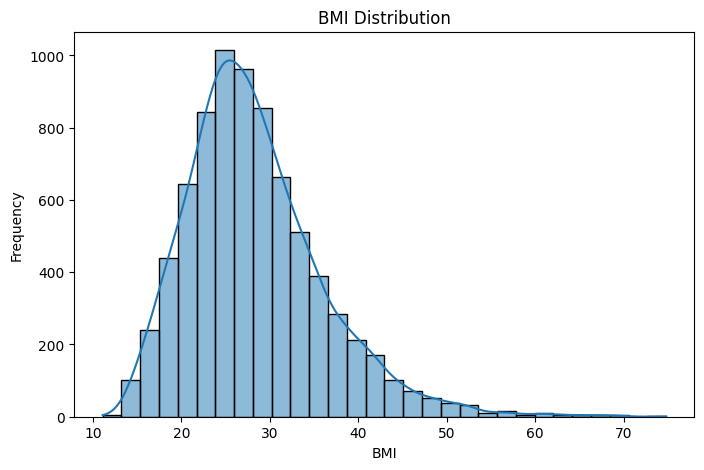

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['BMXBMI'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.savefig('BMI.png')
plt.show()



# **Systolic Blood Pressure Distribution**

### In the Plot given below we can see that the mean systolic blood pressure is around 110-120 mmHg, which is within the normal range.
###  The distribution shows that there are most individuals who fall under the healthy range and there is a significant number who may be at risk of hyperbp.

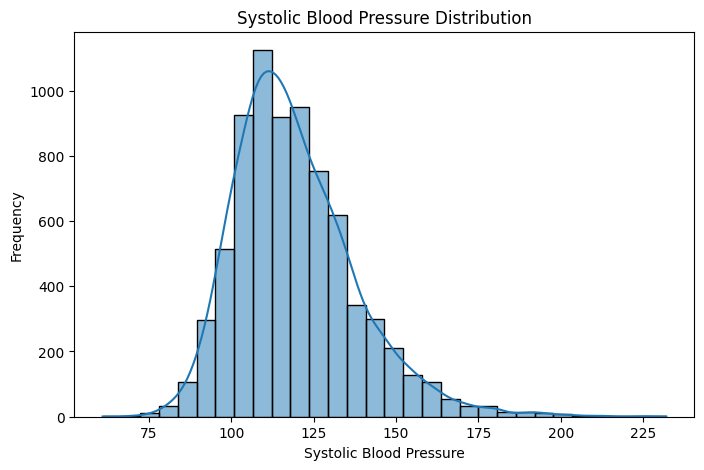

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['BPXOSY1'], bins=30, kde=True)
plt.title('Systolic Blood Pressure Distribution')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.savefig('SBPD.png')
plt.show()


# **Scatter Plot of BMI vs Systolic Blood Pressure**

### In the plot below we can see that people with higher BMI tend to have higher blood pressure, which can increase health risks.



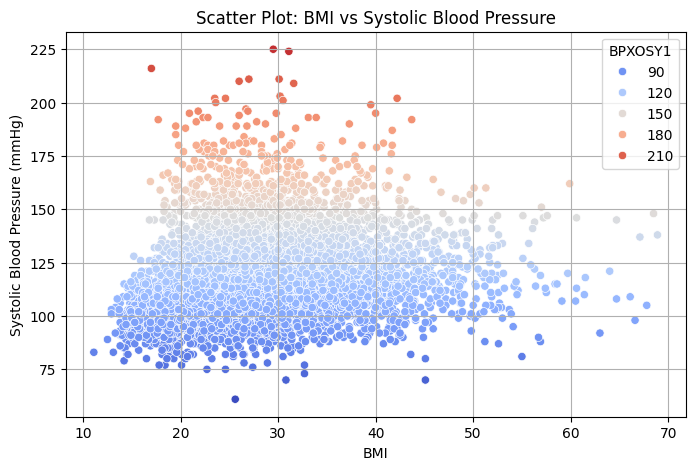

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMXBMI', y='BPXOSY1', data=merged_df, hue='BPXOSY1', palette='coolwarm')
plt.title('Scatter Plot: BMI vs Systolic Blood Pressure')
plt.xlabel('BMI')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.grid(True)

plt.savefig('BMI_vs_SBP.png')
plt.show()

#Average Systolic Blood Pressure by BMI Category Plot

###In the given plot below we can see that people with higher BMI, especially those in the overweight and obese categories, tend to have slightly elevated average blood pressure compared to those with normal or underweight BMI.

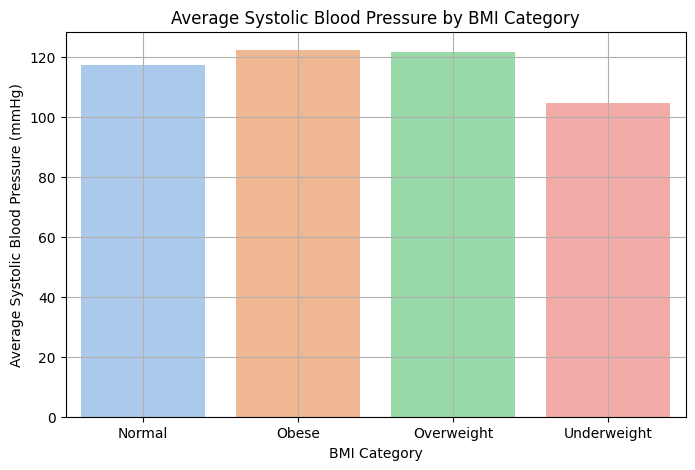

In [ ]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

merged_df['BMI_Category'] = merged_df['BMXBMI'].apply(categorize_bmi)
avg_bp = merged_df.groupby('BMI_Category')['BPXOSY1'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='BMI_Category', y='BPXOSY1', data=avg_bp, hue='BMI_Category', palette='pastel')
plt.title('Average Systolic Blood Pressure by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Systolic Blood Pressure (mmHg)')
plt.grid(True)

plt.savefig('BMI_with_ASBP.png')
plt.show()

Step 4

In [ ]:
merged_df['AvgSystolicBP'] = merged_df[['BPXOSY1', 'BPXOSY2', 'BPXOSY3']].mean(axis=1)
merged_df['Hypertension_Risk'] = merged_df['AvgSystolicBP'].apply(lambda x: 1 if x > 140 else 0)

merged_df['AvgDiastolicBP'] = merged_df[['BPXODI1', 'BPXODI2', 'BPXODI3']].mean(axis=1)
merged_df['AvgPulse'] = merged_df[['BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3']].mean(axis=1)

features = ['BMXBMI', 'AvgDiastolicBP', 'AvgPulse', 'BMXWAIST', 'BMXHT', 'BMXWT']  # Exclude AvgSystolicBP
X = merged_df[features]
y = merged_df['Hypertension_Risk']

In [ ]:
x = X.dropna()
y = y[X.index]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')


In [ ]:
print("Cross-validation Accuracy Scores:", cross_val_scores)
print("Average Accuracy:", cross_val_scores.mean())

Cross-validation Accuracy Scores: [0.91025641 0.89835165 0.90018315 0.91849817 0.92399267]
Average Accuracy: 0.9102564102564102


In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy on Test Set: 0.898334045279795

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2062
           1       0.69      0.27      0.38       279

    accuracy                           0.90      2341
   macro avg       0.80      0.62      0.66      2341
weighted avg       0.88      0.90      0.88      2341


Confusion Matrix:
 [[2029   33]
 [ 205   74]]


##**Implementing the Naïve Bayes Classifier**


In [ ]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Infinite values in X_train:", np.isinf(X_train).sum())

Missing values in X_train: 0
Infinite values in X_train: 0


In [ ]:
print("Variance of each feature in X_train:", np.var(X_train, axis=0))
X_train = X_train[:, np.var(X_train, axis=0) > 0]
X_test = X_test[:, np.var(X_test, axis=0) > 0]

Variance of each feature in X_train: [0.99453051 0.96713859 0.9634434  0.95800405 0.99088457 0.99608053]


In [ ]:
nb_model = GaussianNB()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
try:
    nb_cross_val_scores = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy', error_score='raise')
    print("Naïve Bayes Cross-validation Accuracy Scores:", nb_cross_val_scores)
    print("Naïve Bayes Average Accuracy:", nb_cross_val_scores.mean())
except ValueError as e:
    print("Error during cross-validation:", e)

Naïve Bayes Cross-validation Accuracy Scores: [0.90934066 0.8956044  0.89010989 0.91575092 0.91025641]
Naïve Bayes Average Accuracy: 0.9042124542124542


In [ ]:
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

In [ ]:
print("\nNaïve Bayes Accuracy on Test Set:", accuracy_score(y_test, nb_y_pred))
print("\nNaïve Bayes Classification Report:\n", classification_report(y_test, nb_y_pred))
print("\nNaïve Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_y_pred))


Naïve Bayes Accuracy on Test Set: 0.8863733447244767

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2062
           1       0.55      0.27      0.36       279

    accuracy                           0.89      2341
   macro avg       0.73      0.62      0.65      2341
weighted avg       0.86      0.89      0.87      2341


Naïve Bayes Confusion Matrix:
 [[2000   62]
 [ 204   75]]


#Comparing the Models

In [ ]:
print("=== Comparison of Models ===\n")

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nNaïve Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Classification Report:\n", classification_report(y_test, nb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_y_pred))


=== Comparison of Models ===

Decision Tree Metrics:
Accuracy: 0.898334045279795
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2062
           1       0.69      0.27      0.38       279

    accuracy                           0.90      2341
   macro avg       0.80      0.62      0.66      2341
weighted avg       0.88      0.90      0.88      2341

Confusion Matrix:
 [[2029   33]
 [ 205   74]]

Naïve Bayes Metrics:
Accuracy: 0.8863733447244767
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2062
           1       0.55      0.27      0.36       279

    accuracy                           0.89      2341
   macro avg       0.73      0.62      0.65      2341
weighted avg       0.86      0.89      0.87      2341

Confusion Matrix:
 [[2000   62]
 [ 204   75]]


# Conclusion

1. **Overall Performance**:
   - Decision Tree achieved an accuracy of **89.8%**, slightly higher than Naïve Bayes (88.6%).
   - Both models performed well for the majority class (non-hypertensive individuals).

2. **Class-Specific Observations**:
   - Both models struggled with recall for hypertensive cases due to class imbalance.
   - Decision Tree showed better precision for identifying hypertensive individuals compared to Naïve Bayes.


